In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [150]:
df=pd.read_csv('bigml_59c28831336c6604c800002a.csv')  
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [151]:
df=df.drop('phone number',axis=1)     # column not required
df 

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [152]:
# Finding unique values of categorical columns - state, international plan, voice mail plan
print(df['state'].unique())                             
print(df['international plan'].unique()) 
print(df['voice mail plan'].unique()) 

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
['no' 'yes']
['yes' 'no']


In [153]:
#label encode categorical columns - state, international paln, voie mail paln
from sklearn.preprocessing import LabelEncoder          
lb=LabelEncoder()

df['state']=pd.DataFrame(lb.fit_transform(df['state']))
df['international plan']=pd.DataFrame(lb.fit_transform(df['international plan']))
df['voice mail plan']=pd.DataFrame(lb.fit_transform(df['voice mail plan'])) 
df['churn']=pd.DataFrame(lb.fit_transform(df['churn']))
df 

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [154]:
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int32  
 4   voice mail plan         3333 non-null   int32  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

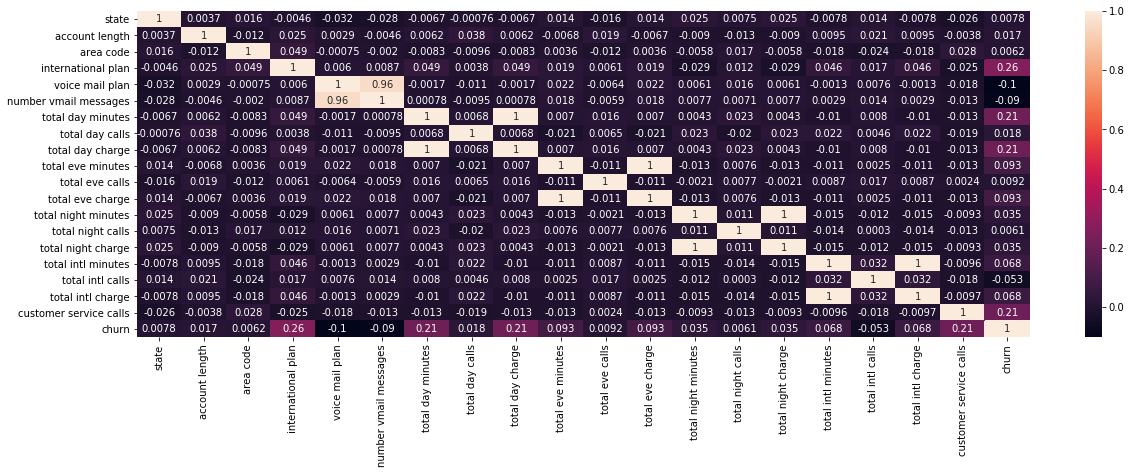

In [157]:
plt.figure(figsize=(20,6))                    
sns.heatmap(df.corr(),annot=True)  

# Univariate Analysis

{'bodies': [<matplotlib.collections.PolyCollection at 0x2833a083bc8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2833a078f48>,
 'cmins': <matplotlib.collections.LineCollection at 0x2833a088d08>,
 'cbars': <matplotlib.collections.LineCollection at 0x2833a088c88>}

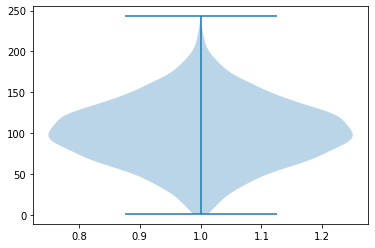

In [158]:
plt.violinplot(df['account length'])

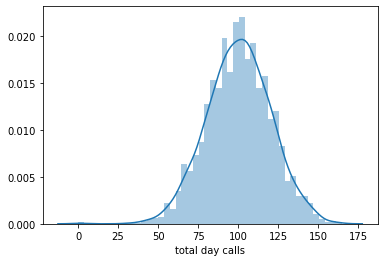

In [159]:
sns.distplot(df['total day calls'])

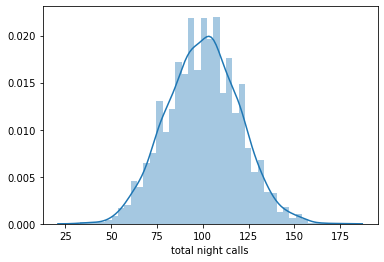

In [160]:
sns.distplot(df['total night calls'])

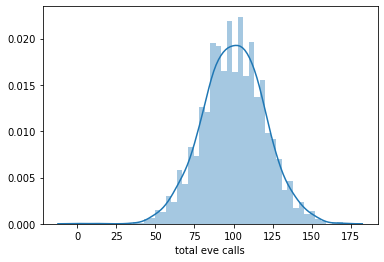

In [161]:
sns.distplot(df['total eve calls'])

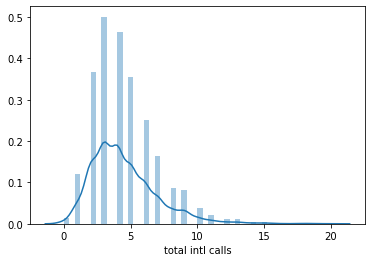

In [162]:
sns.distplot(df['total intl calls'])

# Bivariate analysis according to target variable 'churn'

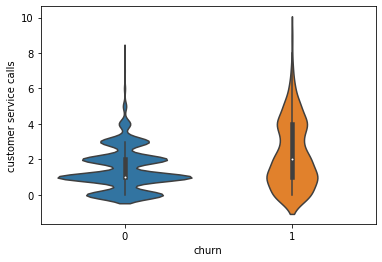

In [163]:
sns.violinplot(x="churn", y="customer service calls", data=df);

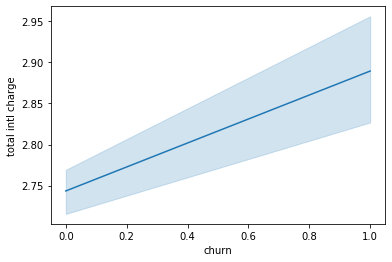

In [164]:
sns.lineplot(x="churn", y="total intl charge", data=df); 

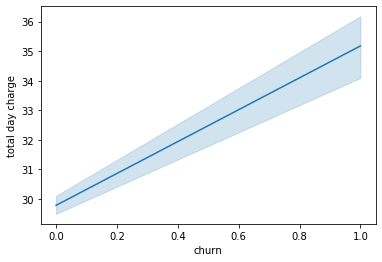

In [165]:
sns.lineplot(x="churn", y="total day charge", data=df); 

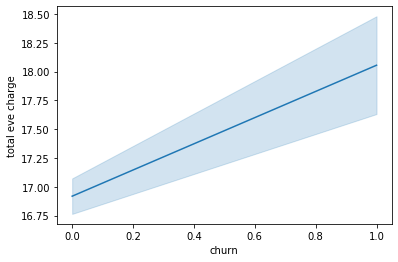

In [166]:
sns.lineplot(x="churn", y="total eve charge", data=df); 

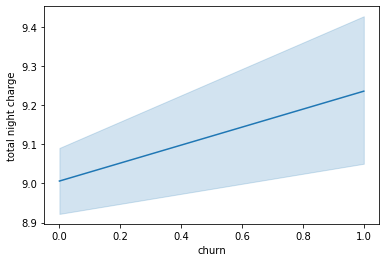

In [167]:
sns.lineplot(x="churn", y="total night charge", data=df); 

In [168]:
# Here I found that increase in day, night, evening and international charges responsible for customer attrition.

# Splitting data into Input and ('churn') i.e. output variables

In [169]:
df_x=df.drop('churn',axis=1)
df_x.head() 

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [170]:
y=pd.DataFrame(df.churn)
y.head() 

,churn
0,0
1,0
2,0
3,0
4,0


In [171]:
#Standard scaling the input variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns) 
x

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,-0.678649,0.676489,-0.523603,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.603170,0.149065,-0.523603,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.333313,0.902529,-0.523603,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,0.603170,-0.428590,-0.688834,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,0.670634,-0.654629,-0.523603,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,-1.555683,2.283878,-0.523603,-0.327580,1.617086,2.038605,-0.432895,-1.167924,-0.433386,0.286348,1.299506,0.286880,1.547039,-0.874374,1.547188,-0.120832,0.617898,-0.125496,0.332354
3329,1.547668,-0.830437,-0.523603,-0.327580,-0.618396,-0.591760,0.942447,-2.164631,0.942714,-0.938353,-2.264816,-0.938172,-0.189297,1.170023,-0.188670,-0.228304,-0.194831,-0.231645,1.092641
3330,0.873026,-1.835055,1.718817,-0.327580,-0.618396,-0.591760,0.018820,0.426808,0.019193,1.731930,-2.114211,1.732349,-0.177431,-0.465494,-0.175486,1.383778,0.617898,1.387123,0.332354
3331,-1.353291,2.082955,1.718817,3.052685,-0.618396,-0.591760,0.624778,0.227466,0.625153,-0.816080,-0.808966,-0.815203,-1.219628,1.885562,-1.221396,-1.876211,2.243356,-1.876950,0.332354


In [172]:
print(y['churn'].unique()) 

[0 1]


In [173]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [174]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [175]:
# as I got the highest accuracy score with respect to random state 46 in KNeighborsClassifier, so I fix the random state 46 for all the Models 
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=46,test_size=0.20)  

In [176]:
print(train_x.shape,test_x.shape) 

(2666, 19) (667, 19)


In [177]:
print(train_y.shape,test_y.shape)

(2666, 1) (667, 1)


In [178]:
def max_accuracy_score(clf,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        clf.fit(train_x,train_y)
        pre = clf.predict(test_x) 
        acc_scr=accuracy_score(test_y,pre)
        print("accuracy score corresponding to random state ",r_state,"is",acc_scr)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state,"is",max_acc_score)
    return final_r_state         

In [179]:
kn=KNeighborsClassifier(n_neighbors=15) 
r_state=max_accuracy_score(kn,x,y)

accuracy score corresponding to random state  42 is 0.8770614692653673
accuracy score corresponding to random state  43 is 0.9025487256371814
accuracy score corresponding to random state  44 is 0.9055472263868066
accuracy score corresponding to random state  45 is 0.8785607196401799
accuracy score corresponding to random state  46 is 0.9115442278860569
accuracy score corresponding to random state  47 is 0.8905547226386806
accuracy score corresponding to random state  48 is 0.8860569715142429
accuracy score corresponding to random state  49 is 0.8845577211394303
accuracy score corresponding to random state  50 is 0.8680659670164917
accuracy score corresponding to random state  51 is 0.8845577211394303
accuracy score corresponding to random state  52 is 0.8755622188905547
accuracy score corresponding to random state  53 is 0.8755622188905547
accuracy score corresponding to random state  54 is 0.8590704647676162
accuracy score corresponding to random state  55 is 0.8980509745127436
accura



Model name - KNeighborsClassifier



Accuracy_score =  0.9115442278860569


Cross_Val_Score =  0.8817904731078384


classification_report
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       585
           1       0.93      0.30      0.46        82

    accuracy                           0.91       667
   macro avg       0.92      0.65      0.71       667
weighted avg       0.91      0.91      0.89       667



confusion matrix
 [[583   2]
 [ 57  25]]


roc_auc_score =  0.6507296226808422


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

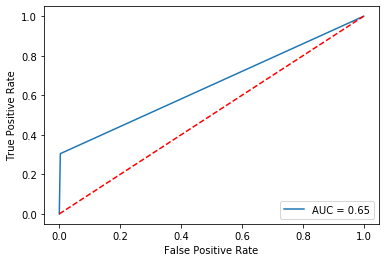

In [180]:
print('\n')
print('Model name - KNeighborsClassifier\n')
print('\n')
kn=KNeighborsClassifier(n_neighbors=15)  
kn.fit(train_x,train_y) 
pre=kn.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(kn, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - SupportVectorClassifier



Accuracy_score=  0.9355322338830585


Cross_Val_Score =  0.9270998543453632


classification_report
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       585
           1       0.79      0.65      0.71        82

    accuracy                           0.94       667
   macro avg       0.87      0.81      0.84       667
weighted avg       0.93      0.94      0.93       667



confusion matrix
 [[571  14]
 [ 29  53]]


roc_auc_score =  0.8112049197415052


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

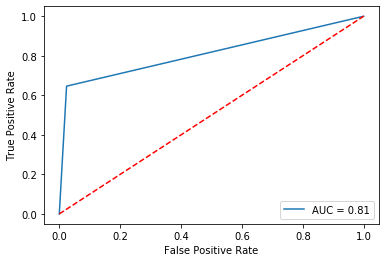

In [181]:
print('\n')
print('Model name - SupportVectorClassifier\n')
print('\n')
sv=SVC(C=10,kernel='rbf') 
sv.fit(train_x,train_y)
pre=sv.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS) 
print('\n')
sc = cross_val_score(sv, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - DecisionTreeClassifier



Accuracy_score=  0.8995502248875562


Cross_Val_Score =  0.9132941324558091


classification_report
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       585
           1       0.57      0.74      0.65        82

    accuracy                           0.90       667
   macro avg       0.77      0.83      0.79       667
weighted avg       0.91      0.90      0.91       667



confusion matrix
 [[539  46]
 [ 21  61]]


roc_auc_score =  0.8326349801959558


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

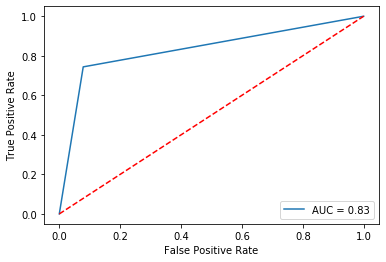

In [182]:
print('\n')
print('Model name - DecisionTreeClassifier\n')
print('\n')
dt=DecisionTreeClassifier(criterion='gini') 
dt.fit(train_x,train_y)
pre=dt.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)  
print('\n')
sc = cross_val_score(dt, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - RandomForestClassifier



Accuracy_score=  0.9610194902548725


Cross_Val_Score =  0.9544038050026075


classification_report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       585
           1       0.92      0.74      0.82        82

    accuracy                           0.96       667
   macro avg       0.94      0.87      0.90       667
weighted avg       0.96      0.96      0.96       667



confusion matrix
 [[580   5]
 [ 21  61]]


roc_auc_score =  0.8676777152386909


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

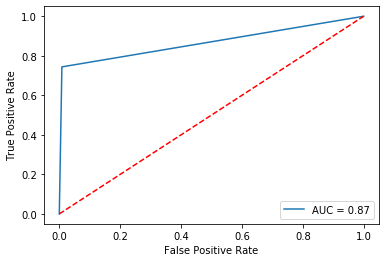

In [183]:
print('\n')
print('Model name - RandomForestClassifier\n')
print('\n')
rfc=RandomForestClassifier(criterion='gini',n_estimators=1000) 
rfc.fit(train_x,train_y) 
pre=rfc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(rfc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GradientBoostingClassifier



Accuracy_score=  0.9145427286356822


Cross_Val_Score =  0.898592904281527


classification_report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       585
           1       0.88      0.35      0.50        82

    accuracy                           0.91       667
   macro avg       0.90      0.67      0.73       667
weighted avg       0.91      0.91      0.90       667



confusion matrix
 [[581   4]
 [ 53  29]]


roc_auc_score =  0.6734104648738795


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

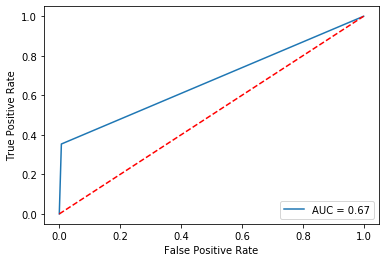

In [184]:
print('\n')
print('Model name - GradientBoostingClassifier\n')
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.001, n_estimators=900) 
gbc.fit(train_x,train_y)
pre=gbc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(gbc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - Logistic Regression



Accuracy_score=  0.8725637181409296


Cross_Val_Score =  0.8601823380266493


classification_report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       585
           1       0.47      0.24      0.32        82

    accuracy                           0.87       667
   macro avg       0.68      0.60      0.62       667
weighted avg       0.85      0.87      0.85       667



confusion matrix
 [[562  23]
 [ 62  20]]


roc_auc_score =  0.6022930998540754


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

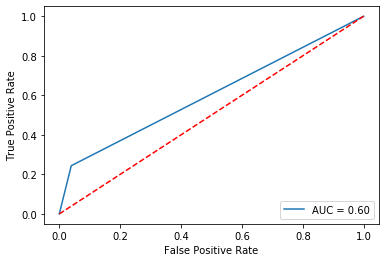

In [185]:
print('\n')
print('Model name - Logistic Regression\n')
print('\n')
lor=LogisticRegression(penalty='l2', C=15, fit_intercept=True)
lor.fit(train_x,train_y)
pre=lor.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(lor, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - AdaBoost Classifier



Accuracy_score=  0.9070464767616192


Cross_Val_Score =  0.9189935444426462


classification_report
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       585
           1       0.59      0.77      0.67        82

    accuracy                           0.91       667
   macro avg       0.78      0.85      0.81       667
weighted avg       0.92      0.91      0.91       667



confusion matrix
 [[542  43]
 [ 19  63]]


roc_auc_score =  0.8473942047112779


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

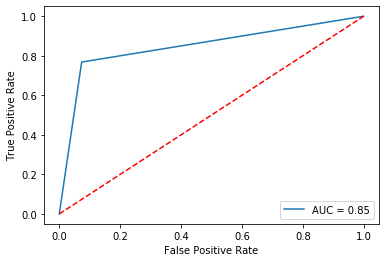

In [186]:
print('\n')
print('Model name - AdaBoost Classifier\n')
print('\n')
adc=AdaBoostClassifier(base_estimator=dt,learning_rate=0.01,n_estimators=10,algorithm='SAMME')
adc.fit(train_x,train_y)
pre=adc.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(adc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - XGBoost Classifier



Accuracy_score=  0.9655172413793104


Cross_Val_Score =  0.956499613385841


classification_report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       585
           1       0.94      0.77      0.85        82

    accuracy                           0.97       667
   macro avg       0.95      0.88      0.91       667
weighted avg       0.96      0.97      0.96       667



confusion matrix
 [[581   4]
 [ 19  63]]


roc_auc_score =  0.8807275380446112


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

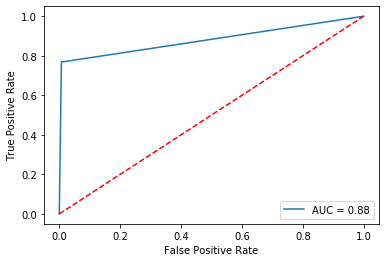

In [187]:
print('\n')
print('Model name - XGBoost Classifier\n')
print('\n')
xgb=XGBClassifier(alpha=1, max_depth=6)
xgb.fit(train_x,train_y)
pre=xgb.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(xgb, x, y, cv=10, scoring='accuracy').mean() 
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GaussianNB



Accuracy_score =  0.8770614692653673


Cross_Val_Score =  0.8646940353527179


classification_report
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       585
           1       0.50      0.54      0.52        82

    accuracy                           0.88       667
   macro avg       0.72      0.73      0.72       667
weighted avg       0.88      0.88      0.88       667



confusion matrix
 [[541  44]
 [ 38  44]]


roc_auc_score =  0.7306858453199917


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

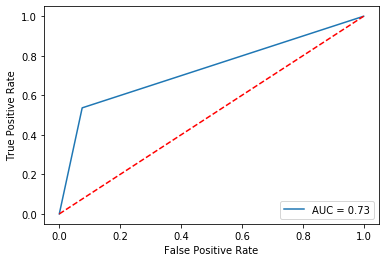

In [188]:
print('\n')
print('Model name - GaussianNB\n')
print('\n')
gnb=GaussianNB()
gnb.fit(train_x,train_y)
pre=gnb.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(gnb, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n') 
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')

In [190]:
# Here XGBoostClassifier is working best with an Accuracy Score of 0.9655172413793104 so I am saving the Model
from sklearn.externals import joblib
joblib.dump(xgb, 'XGBoostClassifier_Customer_churn_analysis.pkl') 

['XGBoostClassifier_Customer_churn_analysis.pkl']